# 1.Brain Tumor Classifier project :

#### the dataset consist of 4 folder and they are the types of tumor: glioma,meningioma,notumor,and pituitary


#### in this notebook we will make a classifier to know what is the type of tumor.

In [1]:
#importing libraries:
import tensorflow as tf
import cv2
import keras
import matplotlib.pyplot as plt
import os 
import glob as gb 
import pandas as pd 
import numpy as np
import random
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# 2. Data Preparation:

# 2.1 Load and visualize the data

In [2]:
locat_training=r"C:\Users\ahmed\Downloads\Compressed\archive_2\Training"
locat_testing = r"C:\Users\ahmed\Downloads\Compressed\archive_2\Testing"
locat_checkpoints=r"C:\Users\ahmed\Downloads\Compressed\archive_2"

In [3]:
v=0
for folder in os.listdir(locat_training):
    files=gb.glob(pathname=str(locat_training+"//"+folder+"/*.jpg"))
    x= len(files)
    v=v+x
    print(f"the training images in folder {folder} is {len(files)} ")
print(f"the total images is {v}")

the training images in folder glioma is 1321 
the training images in folder meningioma is 1339 
the training images in folder notumor is 1595 
the training images in folder pituitary is 1457 
the total images is 5712


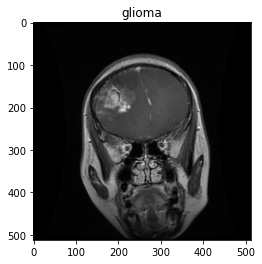

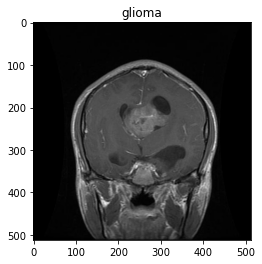

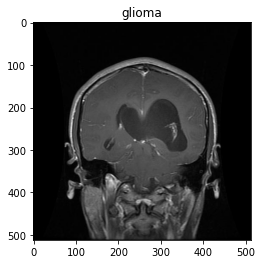

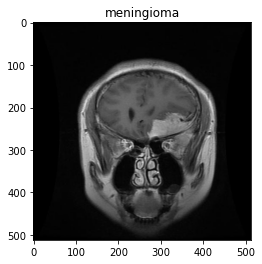

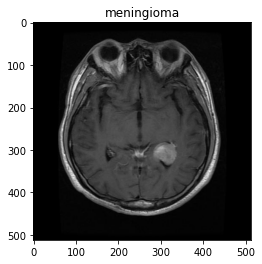

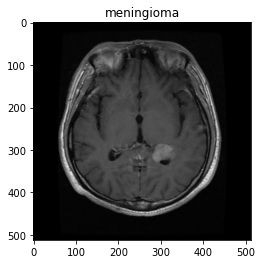

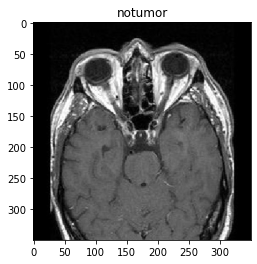

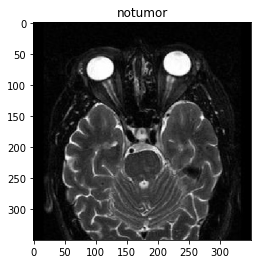

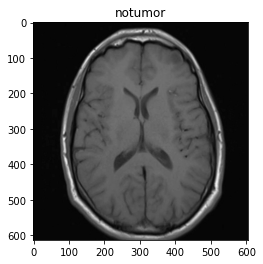

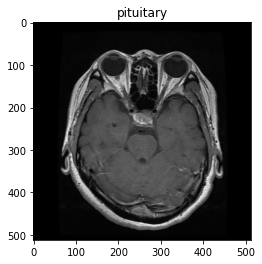

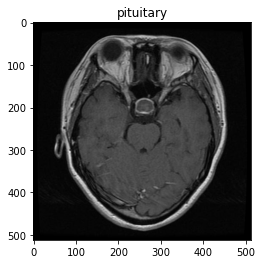

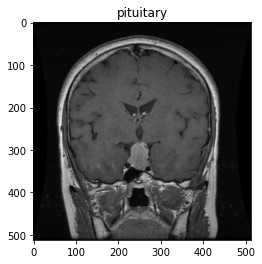

The size of training set is 5712 
(512, 512)    3955
(225, 225)     268
(630, 630)      77
(236, 236)      53
(251, 201)      43
              ... 
(236, 255)       1
(218, 233)       1
(401, 312)       1
(369, 503)       1
(741, 900)       1
Length: 382, dtype: int64


In [4]:
train_size=[]
for folder in os.listdir(locat_training):
    x=0
    files=gb.glob(pathname=str(locat_training+"//"+folder+"/*.jpg"))
    for file in files:
        img=cv2.imread(file,cv2.IMREAD_GRAYSCALE)
        train_size.append(img.shape)
        x=x+1
        if x<=3:
            plt.imshow(img, cmap='gray')
            plt.title(folder)
            plt.show()
            
print(f"The size of training set is {len(train_size)} ")
print(pd.Series(train_size).value_counts())

In [5]:
v=0
for folder in os.listdir(locat_testing):
    files=gb.glob(pathname=str(locat_testing+"//"+folder+"/*.jpg"))
    x= len(files)
    v=v+x
    print(f"the testing images in folder {folder} is {len(files)} ")
print(f"the total images is {v}")

the testing images in folder glioma is 300 
the testing images in folder meningioma is 306 
the testing images in folder notumor is 405 
the testing images in folder pituitary is 300 
the total images is 1311


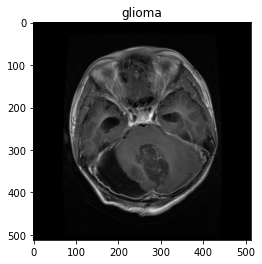

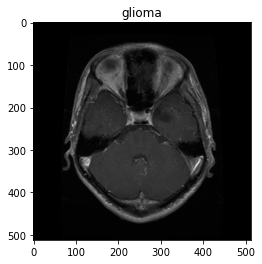

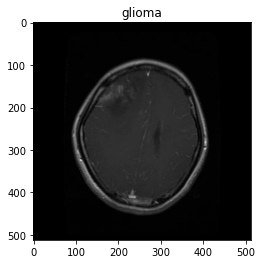

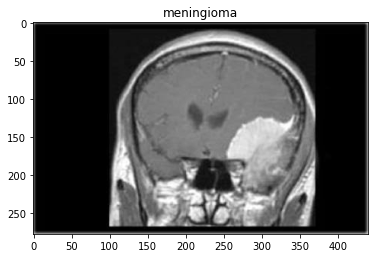

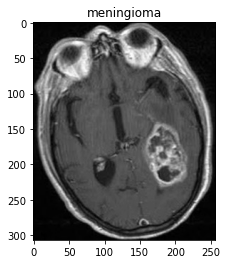

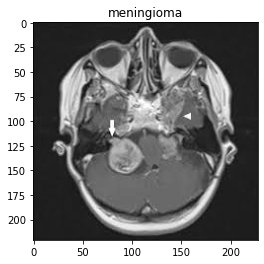

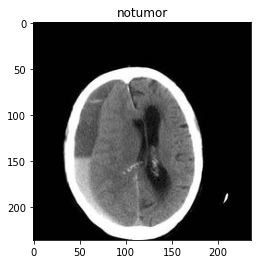

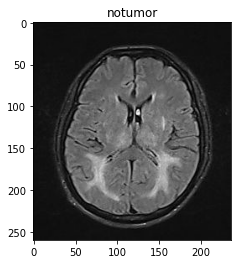

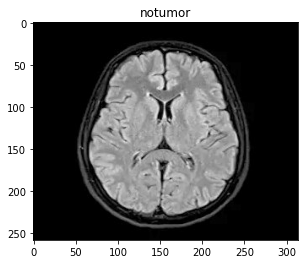

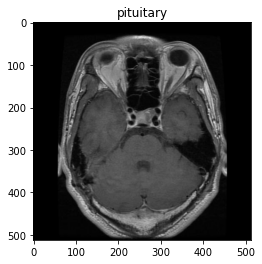

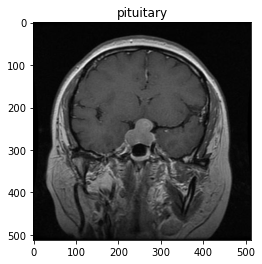

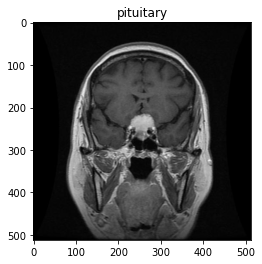

The size of testing set is 1311 
(512, 512)    787
(225, 225)     64
(236, 236)     28
(222, 227)     17
(251, 201)     15
             ... 
(248, 239)      1
(354, 289)      1
(337, 305)      1
(410, 304)      1
(474, 356)      1
Length: 194, dtype: int64


In [6]:
test_size=[]
for folder in os.listdir(locat_testing):
    x=0
    files=gb.glob(pathname=str(locat_testing+"//"+folder+"/*.jpg"))
    for file in files:
        img=cv2.imread(file,cv2.IMREAD_GRAYSCALE)
        test_size.append(img.shape)
        x=x+1
        if x<=3:
            plt.imshow(img, cmap='gray')
            plt.title(folder)
            plt.show()

print(f"The size of testing set is {len(test_size)} ")
print(pd.Series(test_size).value_counts())

# 2.2 Data augmentation

In [51]:
img_size=80
train_datagen=ImageDataGenerator(rotation_range=5,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1.0/255.0 )

train_generator=train_datagen.flow_from_directory(locat_training,
    class_mode='binary',
    color_mode='grayscale',
    batch_size=32,
    target_size=(img_size,img_size)
)

Found 5712 images belonging to 4 classes.


In [52]:
test_datagen=ImageDataGenerator(rescale=1.0/255.0 )
test_generator=train_datagen.flow_from_directory(
    locat_testing,
    class_mode='binary',
    color_mode='grayscale',
    batch_size=32,
    target_size=(img_size,img_size)
)

Found 1311 images belonging to 4 classes.


# 3.1 let's build CNN model :

In [66]:
filter_size=(5,5)
model=keras.models.Sequential([
    
    keras.layers.Conv2D(32,kernel_size=filter_size,activation='relu',input_shape=(img_size,img_size,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(.2),
    
    keras.layers.Conv2D(64,kernel_size=filter_size,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(.2),
    
    keras.layers.Conv2D(128,kernel_size=filter_size,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(.2),

    keras.layers.Conv2D(128,kernel_size=filter_size,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(.2),
    
    keras.layers.Dense(4,activation=tf.nn.softmax)
])

In [67]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)

model.compile(optimizer =optimizer,loss='sparse_categorical_crossentropy',metrics= ['accuracy'])

In [68]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 76, 76, 32)        832       
                                                                 
 batch_normalization_35 (Bat  (None, 76, 76, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 38, 38, 32)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 38, 38, 32)        0         
                                                                 
 conv2d_36 (Conv2D)          (None, 34, 34, 64)        51264     
                                                                 
 batch_normalization_36 (Bat  (None, 34, 34, 64)     

In [78]:
model_es = EarlyStopping(monitor = 'loss',  patience =3 , verbose = 1)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model_mcp = ModelCheckpoint(filepath =locat_checkpoints, monitor = 'val_categorical_accuracy', save_best_only = True, verbose = 1)

In [80]:
epoch=100
model.fit(train_generator, 
    epochs=epoch,
    validation_data=test_generator,
    callbacks=[model_es, model_rlr, model_mcp])

Epoch 1/3
179/179 [==============================] - 33s 183ms/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0318 - val_accuracy: 0.9908 - lr: 8.0000e-06
Epoch 2/3
179/179 [==============================] - 33s 183ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.0238 - val_accuracy: 0.9924 - lr: 8.0000e-06
Epoch 3/3
179/179 [==============================] - 33s 186ms/step - loss: 0.0209 - accuracy: 0.9914 - val_loss: 0.0293 - val_accuracy: 0.9901 - lr: 8.0000e-06
